# HDB Resale Price Prediction

This projects aims to predict resale prices of HDB using a Supervised Learning technique (Regression). 

### Import required libraries 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

## Background Research and Data Exploration

There are 5 csv files within a parent folder 
- Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv
- Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv
- Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv
- Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv
- Resale flat prices based on registration date from Jan-2017 onwards.csv

In [5]:
df1 = pd.read_csv(r"C:\Users\basbh\Documents\Projects\ipynb_python_files\ResaleFlatPrices\Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")
df2 = pd.read_csv(r"C:\Users\basbh\Documents\Projects\ipynb_python_files\ResaleFlatPrices\Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
df3 = pd.read_csv(r"C:\Users\basbh\Documents\Projects\ipynb_python_files\ResaleFlatPrices\Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df4 = pd.read_csv(r"C:\Users\basbh\Documents\Projects\ipynb_python_files\ResaleFlatPrices\Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df5 = pd.read_csv(r"C:\Users\basbh\Documents\Projects\ipynb_python_files\ResaleFlatPrices\Resale flat prices based on registration date from Jan-2017 onwards.csv")


dataframes = [df1, df2, df3, df4, df5]

for i, df in enumerate(dataframes, start=1):
    print(f"Columns in df{i}:")
    print(df.info())
    print("------------------------")


Columns in df1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
None
------------------------
Columns in df2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count 

In [6]:
for i, df in enumerate(dataframes, start=1):
    print(f"Columns in df{i}:")
    print(df.describe())
    print("------------------------")

Columns in df1:
       floor_area_sqm  lease_commence_date  resale_price
count   287196.000000        287196.000000  287196.00000
mean        93.351778          1983.206897  219541.67471
std         27.361872             6.085632  128145.25346
min         28.000000          1967.000000    5000.00000
25%         68.000000          1979.000000  127000.00000
50%         91.000000          1984.000000  195000.00000
75%        113.000000          1987.000000  298000.00000
max        307.000000          1997.000000  900000.00000
------------------------
Columns in df2:
       floor_area_sqm  lease_commence_date   resale_price
count   369651.000000        369651.000000  369651.000000
mean        96.586204          1987.984659  281271.860617
std         25.598886             9.122421  112118.967206
min         28.000000          1966.000000   28000.000000
25%         73.000000          1981.000000  195000.000000
50%        100.000000          1987.000000  263000.000000
75%        115.000000   

In [7]:
for i, df in enumerate(dataframes, start=1):
    print(f"Columns in df{i}:")
    print(df.isnull().sum())
    print("------------------------")

Columns in df1:
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64
------------------------
Columns in df2:
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64
------------------------
Columns in df3:
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64
------------------------
Columns in df4:
month                  0
town                  

Definitions of columns in the dataset
1. month: The month and year when the flat was officially registered as sold.
2. town: The name of the town or estate where the flat is located
3. flat_type: The type of flat based on the number of rooms 
4. block: The block number of the flat, used to identify the building.
5. street_name: The name of the street where the flat is located
6. storey_range: The range of floors the flat is located in
7. floor_area_sqm: The size of the flat in square metres (sqm)
8. flat_model: The design/model of the flat, based on HDB's architectural types
9. lease_commence_date: The year the 99-year lease of the flat started. This helps determine how old the flat is
10. remaining_lease: How many years are left on the lease at the time of sale. This affects the value of the flat
11. resale_price: 	The price (in SGD) that the flat was sold for in the resale market.


In [8]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [9]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [10]:
df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [11]:
df4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [12]:
df5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


The 3rd and 5th dataframes contain an extra column "remaining_lease" while the other dataframes do not. Before determining whether or not the extra column should be modified in any way, we need to find out if "remaining_lease" has any correlation with the resale_price of HDB flats.

The "remaining lease" column in df5 contains string values in comparison to df3 where the "remaining_lease" column contains integer values

First we will take a look at the resale_price distribution of each dataset


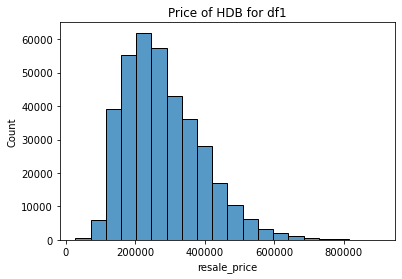

------------------------


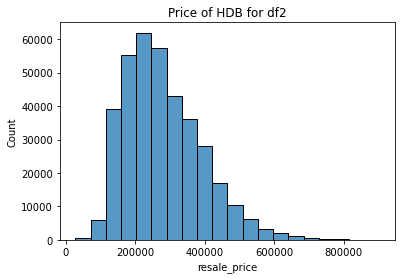

------------------------


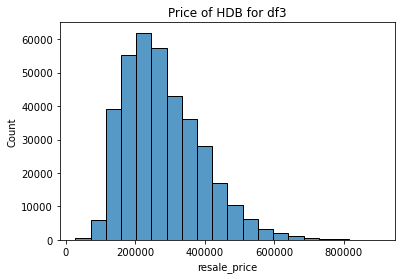

------------------------


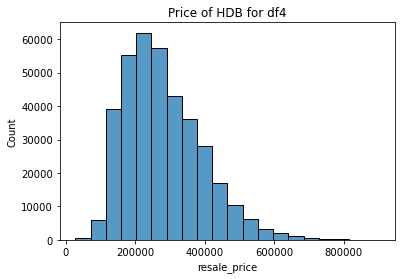

------------------------


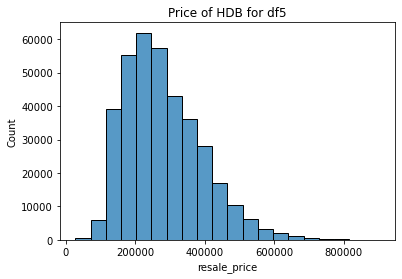

------------------------


In [13]:
for i, df in enumerate(dataframes, start=1):
    sns.histplot(x= 'resale_price', data=df2, bins = 20)
    plt.title(f"Price of HDB for df{i}")
    plt.show()
    print("------------------------")
    

All the resale prices in datasets are right-skewed

## Feature Engineering

Firstly, the "remaining_lease" column in df5 will be converted into a float. Using the convert_lease_to_years function, the values in the column are split using the.split() method and the months are divided by 12 to be added back to the years. And the float value will finally be updated to the original dateset 

In [14]:
# def convert_lease_to_years(remaining_lease):
#     # isinstance() used to check for the column datatype 
#     if isinstance(remaining_lease, str) or isinstance(remaining_lease,int):
#         # .split() to break the strings apart. ["61", "years", "04", "months"]
#         parts = remaining_lease.split()
#         # Using indexing to get years
#         years = int(parts[0])
#         # To get the months 
#         months = int(parts[2]) if len(parts) > 2 else 0
#         # The months are divided by 12 and added to the years
#         return years + months / 12
#     else:
#         return None  

# # Passing the function to df5 
# df5['remaining_lease'] = df5['remaining_lease'].apply(convert_lease_to_years).round(1)


The "reamining_lease" column in df5 is now converted from a string to a float

In [15]:
# df5.head()

In [16]:
# df5.info()

### Correlation Matrix 

Finding the Correlation between Numerical Variables and HDB Resale Price for each CSV file

1  - Perfect Positive Relationship (when one goes up, the other also goes up)\
0  - No relationship at all \
-1 - Perfect negative Relationship (when one goes up, the other goes down)

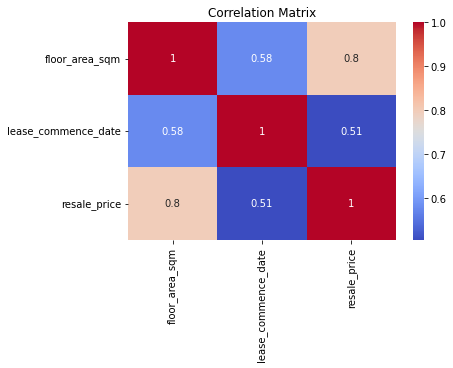

In [17]:
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

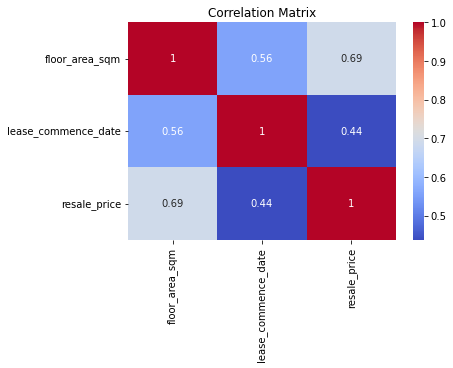

In [18]:
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

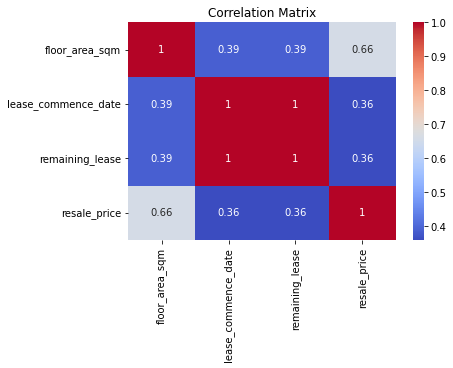

In [19]:
corr_matrix = df3.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

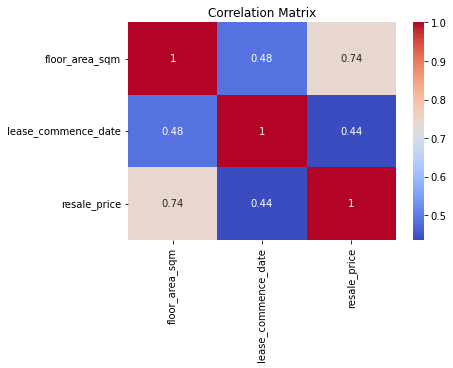

In [20]:
corr_matrix = df4.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

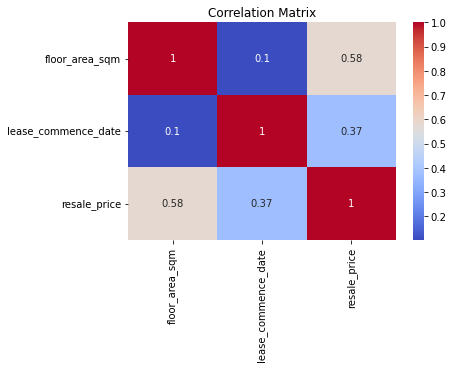

In [21]:
corr_matrix = df5.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

After viewing the correlation matrix, we can conclude that the "floor_area_sqm" variable has a positive correlation with "resale_price" which is the target variable (0.58 - 0.8). This means the larger the flat, the higher the resale price\

"remaining_lease" has a moderately strong positive correlation to the resale price with the values ranging from 0.37 to 0.51. Therefore it would be useful to keep the "remaining_lease"\

In that case, dropping the "remaining_lease" column could remove domain knowledge. Since the other 3 CSV files do not have the "remaining_lease" column, we can use the "month" and "lease_commence_date" to calculate the remaining_lease. The formula that we will be using is:\
remaining_lease = month - lease_commence_date

Furthermore, the "remaining_lease" column in the 5th CSV file is a string as it consists of values such as "61 years 04 months" which is a string. We can convert the string into a float so that it we can see how much correlation does "remaining_lease" have in the combined CSV file. 

The convert_remaining_lease_to_years method takes in 1 arguement which is a value from the "remaining_lease" column of the dataframe. It then uses the isInstance method to check for integers and floats. The reason we are changing Integers to floats (in the 3rd CSV) is because if we keep it as an Int, it will not be handled properly and will Nan after using .apply(). Therefore all Integers will become floats by adding a ".0" at the end.\ 

The process_csv method finds all the CSV files within a folder and it first extracts the year component from the "month" column. Next checks if "remaining_lease" and "lease_commence_date" columns exists in data frame. It then generates a "sale_year" column which is extracting the year out of the "month" column. It calculates the number of years used by subtracting lease_commence_date from the year of sale (sale_year), and then subtracts that from 99 to get the remaining_lease at the time of sale.. The sale_year column is then dropped\ 

The process_csv method then calls the convert_remaining_lease_to_years method and applies it to the "remaining_lease" column to convert all values into floats

In [22]:
def convert_remaining_lease_to_years(remaining_lease):
    if isinstance(remaining_lease, (int, float)):
        return float(remaining_lease)
    
    elif isinstance(remaining_lease, str):
        parts = remaining_lease.lower().replace("and", "").split()
        
        years = 0
        months = 0
        
        for i in range(len(parts)):
            if parts[i] == "years":
                years = int(parts[i - 1])
            elif parts[i] == "months":
                months = int(parts[i - 1])
                
        return years + months / 12
    
    else:
        return None

In [23]:
def process_csv(folder_path):
    files = glob.glob(os.path.join(folder_path, "*.csv"))
    dfs = []

    for file in files:
        df = pd.read_csv(file)

        # Ensure 'month' is in datetime format
        df['month'] = pd.to_datetime(df['month'], format='%Y-%m', errors='coerce')

        # If 'remaining_lease' is missing, generate it from lease_commence_date
        if 'remaining_lease' not in df.columns and 'lease_commence_date' in df.columns:
            df['sale_year'] = df['month'].dt.year
            df['remaining_lease'] = 99 - (df['sale_year'] - df['lease_commence_date'])
            df.drop(columns='sale_year', inplace=True)

        # Now convert all 'remaining_lease' to float using unified method
        df['remaining_lease'] = df['remaining_lease'].apply(convert_remaining_lease_to_years)

        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    print("Files Concatenated and Standardized Successfully")

    return combined_df


folder_path = r"C:\Users\basbh\Documents\Projects\ipynb_python_files\ResaleFlatPrices"
final_df = process_csv(folder_path)

# Save final result
# final_df.to_csv("final_combined.csv", index=False)


Files Concatenated and Standardized Successfully


### Concatenating 5 CSV files into 1

In [24]:
df_combined = pd.read_csv(r"C:\Users\basbh\Documents\Projects\ipynb_python_files\final_combined.csv")
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955128 entries, 0 to 955127
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                955128 non-null  object 
 1   town                 955128 non-null  object 
 2   flat_type            955128 non-null  object 
 3   block                955128 non-null  object 
 4   street_name          955128 non-null  object 
 5   storey_range         955128 non-null  object 
 6   floor_area_sqm       955128 non-null  float64
 7   flat_model           955128 non-null  object 
 8   lease_commence_date  955128 non-null  int64  
 9   resale_price         955128 non-null  float64
 10  remaining_lease      955128 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 80.2+ MB


In [25]:
df_combined.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0


In [26]:
df_combined.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
955123,2025-02-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1100888.0,62.00
955124,2025-04-01,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,988000.0,61.75
955125,2025-04-01,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,975000.0,61.75
955126,2025-05-01,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,1000000.0,61.75
955127,2025-05-01,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,04 TO 06,147.0,Multi Generation,1987,945000.0,61.50


In [27]:
df_combined['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

From the flat_type column, we can see that there are duplicated values (MULTI GENERATION). Therefore we can standardize and group them together by doing some feature engineering and removing the "-". This could be due to the inconsistencies in different csv files 

In [28]:
df_combined['flat_type'] = df_combined['flat_type'].str.replace('-', ' ')

Next we can remove leading and trailing charcaters and whitespaces

In [29]:
df_combined['flat_type'] = df_combined['flat_type'].str.strip().str.title()

Double check if the code worked

In [30]:
df_combined['flat_type'].unique()

array(['1 Room', '3 Room', '4 Room', '5 Room', '2 Room', 'Executive',
       'Multi Generation'], dtype=object)

In [31]:
df_combined['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'Type S1', 'Type S2',
       'DBSS', 'Premium Apartment Loft', '3Gen'], dtype=object)

There are duplicated values with the same meaning. Therefore we can use .title() to standardize the flat_models

In [32]:
df_combined['flat_model'] = df_combined['flat_model'].str.strip().str.title()

In [33]:
print(df_combined['flat_model'].unique())


['Improved' 'New Generation' 'Model A' 'Standard' 'Simplified'
 'Model A-Maisonette' 'Apartment' 'Maisonette' 'Terrace' '2-Room'
 'Improved-Maisonette' 'Multi Generation' 'Premium Apartment'
 'Adjoined Flat' 'Premium Maisonette' 'Model A2' 'Type S1' 'Type S2'
 'Dbss' 'Premium Apartment Loft' '3Gen']


### Finding the correlation of all the numerical variables in the combined dataset 

<AxesSubplot:>

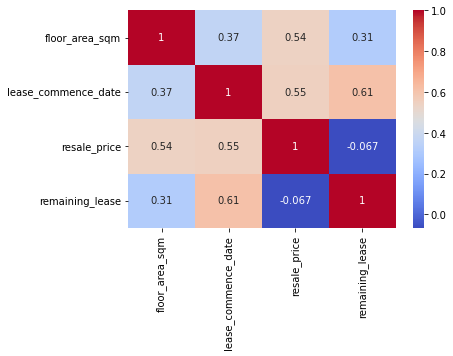

In [34]:
corr = df_combined.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


### Viewing the number of Flats per Town 

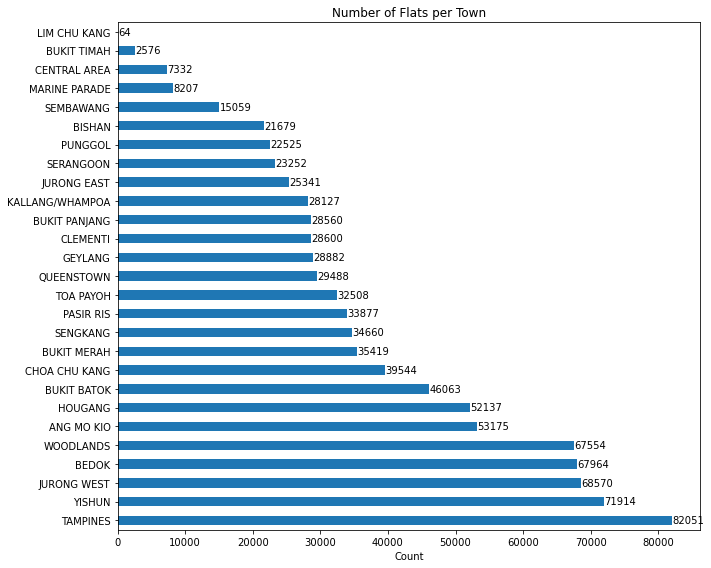

In [35]:
value_counts = df_combined['town'].value_counts()
ax = value_counts.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Flats per Town')
plt.xlabel('Count')

# Add counts to the end of each bar
for i, v in enumerate(value_counts): # Loop that goes through every bar (i being the index(0 for the first and 1 for the second) and v being the value(how many flats in that bar))
    plt.text(v + 50, i, str(v), va = "center") 
    # X position of the bar:  v + 50 being the X position of the text. Being 50 units to the right of the bar
    # Y position of the bar: Y position of the text (same as the bar's position)
    # str(v):Converts the number to text so it can be shown on the chart
    # va = "center": Aligns the text to the center of the bar
    
plt.tight_layout()
plt.show()


We can see from the horizontal bar plot that Tampines has the highest number of flats per town with 8205. This could be due to its development as a large, densely populated residential town by the Housing and Development Board (HDB). On the other hand, Lim Chu Kang has few flats because it was historically designated as a rural area with farms and plantations. The government's focus shifted towards resettlement and development in other areas, leading to the eventual clearance of the small public housing estate (Neo Tiew Estate) in Lim Chu Kang. The area is now primarily used for military training and is not intended for large-scale residential development

### Viewing the distribution of the target variable of the combined dataset 

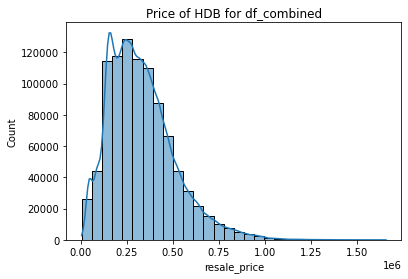

In [36]:
sns.histplot(df_combined['resale_price'], kde=True, bins=30)
plt.title(f"Price of HDB for df_combined")
plt.show()

Based on the histogram above, we can see that it is right skewed. Which means there are exceptionally high values creating a tail on the right side of the histogram

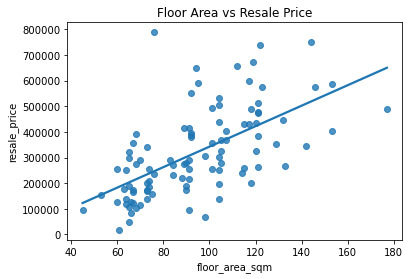

In [43]:
sample_df = df_combined.sample(n=100, random_state=42)

sns.regplot(x='floor_area_sqm', y='resale_price', data=sample_df , ci=None)
plt.title('Floor Area vs Resale Price')
plt.show()

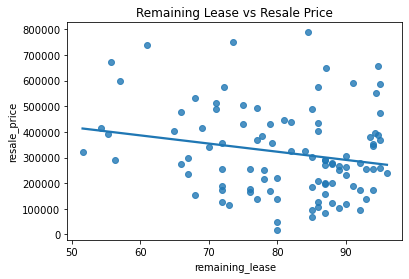

In [46]:
sns.regplot(x='remaining_lease', y='resale_price', data=sample_df , ci=None)
plt.title('Remaining Lease vs Resale Price')
plt.show()

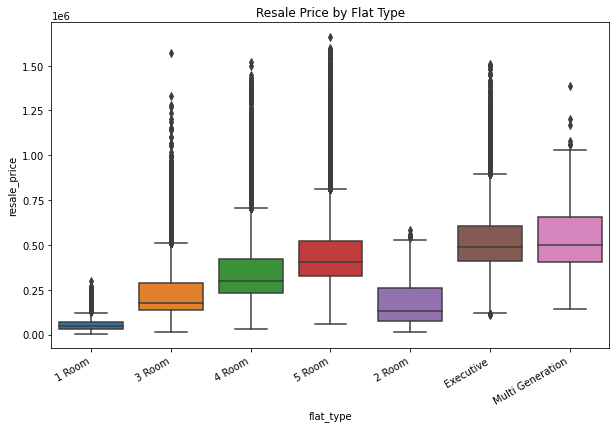

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_combined, x='flat_type', y='resale_price')

# Rotate x-axis labels for clarity
plt.xticks(rotation=30, ha='right') 

plt.title('Resale Price by Flat Type')
plt.show()


The boxplot visualizes resale prices across various flat types. We observe that:
1. Median resale prices generally increase with the flat size. For instance, 1- and 2-room flats have the lowest medians, while Executive and Multi-Generation flats have the highest (around $500,000).
2. Price spread (IQR) grows with flat size: Larger flats (4-, 5-room, Executive, Multi-Gen) have wider interquartile ranges, indicating more variability in resale prices within those types.
3. Outliers are especially prominent in 3-room and above, particularly 5-room and Executive flats. These represent resale flats sold at unusually high prices — possibly due to location, or other premium features.
4. 1 and 2-room flats have tighter price distributions and fewer extreme outliers, reflecting more standardization in pricing.
5. Multi-Generation flats show a wide IQR and extreme outliers, suggesting a niche but variable market with some very high-priced transactions.

Text(0.5, 1.0, 'Price Trends by Flat Type')

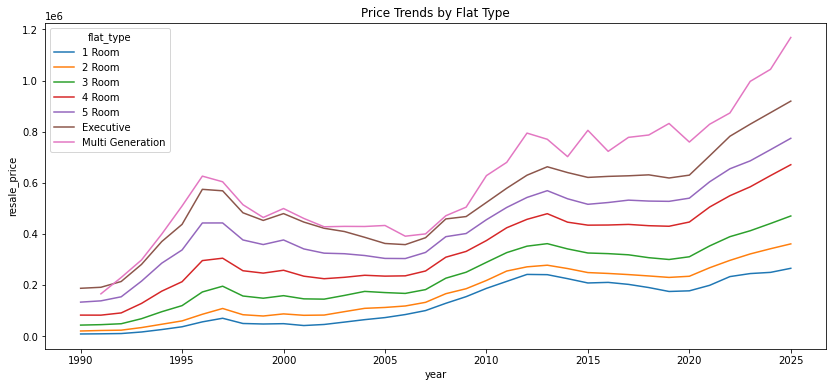

In [47]:
df_grouped = df_combined.groupby(['month', 'flat_type'])['resale_price'].mean().reset_index()
df_grouped['month'] = pd.to_datetime(df_grouped['month'], format='%Y-%m', errors='coerce')
df_grouped['year'] = df_grouped['month'].dt.year
plt.figure(figsize=(14,6))
sns.lineplot(data=df_grouped, x='year', y='resale_price', hue='flat_type', ci=None)
plt.title('Price Trends by Flat Type')

The line graph shows average resale price trends by flat type from 1990 to 2025. A few key patterns emerge:

1. All flat types exhibit long-term growth in resale prices, despite short-term dips — notably in the late 1990s and around 2013–2015
2. 1-room and 2-room flats have the lowest resale prices and follow a similar trajectory, rising more gradually over time with less volatility.
3. 3-room to Executive flats follow closely aligned trends, with clear growth from the mid-2000s to early 2010s, suggesting similar demand drivers (e.g. affordability, family suitability).
4. Multi-Generation flats have the highest prices but also the most volatile trend post-2010.This could be due to their larger size and the specific eligibility requirements that restrict the pool of potential buyers, leading to sharper swings in average price.
5. Around 2013 to 2015, resale prices across all flat types plateau or dip slightly, likely due to government cooling measures.
6. Since around 2017, prices have been trending upward again, with sharp increases after 2020, potentially linked to COVID-era supply shortages and increased housing demand.

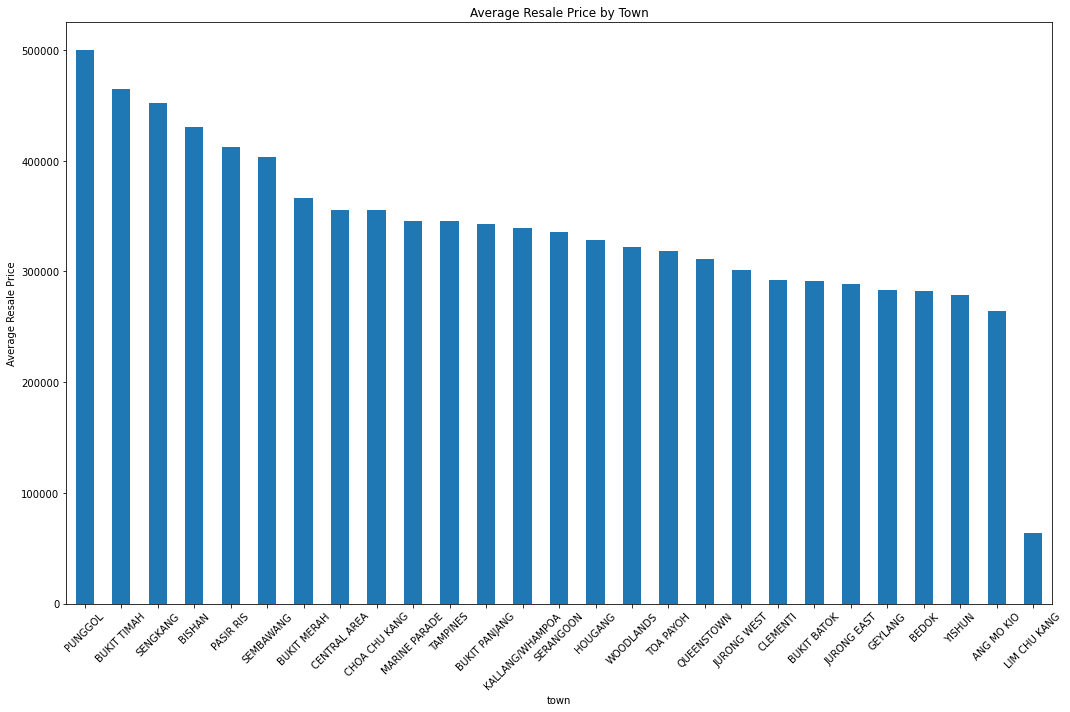

In [41]:
df_combined.groupby('town')['resale_price'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15, 10))
plt.title("Average Resale Price by Town")
plt.ylabel("Average Resale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above bar graph we can see that Punggol's average resale prices are the highest whilist Tampines, being the area with the highest number of flats in town is only about $350,000. Lim Chu kang on the other hand has exceptionally low average resale prices due to it being a more rural area. Punggol,Bukit Timah, Sengkang have higher HDB resale flat prices which could be due to a combination of factors including strong demand, desirable locations, and future development plans. This could also be because of their central location, good schools, and proximity to MRT lines and amenities

## Model Pipeline 

First we will import all the necessary metrics and models from the sklearn libraries such as mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score. The models imported are  LinearRegression, Ridge, Lasso, BayesianRidge and DecisionTreeRegressor\
\
We also import preprocessing tools such as:\
StandardScaler for Z-score normalization - used to standardize features by removing mean and scaling to unit variance (z = (x - u) / s)\
OneHotEncoder - converts categorical features to numerical features. 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Regressors
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor

X = df_combined[['town', 'floor_area_sqm', 'flat_type', 'storey_range', 'flat_model','remaining_lease']]
y = df_combined['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

numeric_features = ['floor_area_sqm','remaining_lease']
categorical_features = ['town', 'flat_type', 'storey_range', 'flat_model']

numeric_transformer = StandardScaler()

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=True, handle_unknown='ignore')),
    # Reduces the number of columns (dimensionality) while keeping as much useful information
    ('svd', TruncatedSVD(n_components=50, random_state=42)) 
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

clfs = [
    ('Linear Regression', LinearRegression()),
    ('Bayesian Ridge', BayesianRidge()),
    ('Lasso', Lasso(alpha=0.1)),
    ('Ridge', Ridge(alpha=0.5)),
    ('Decision Tree', DecisionTreeRegressor(max_depth=10))
]

scores_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2'])

for name, model in clfs:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Train & test predictions
    y_pred_train = pipeline.predict(X_train)

    # Store metrics
    scores_df = pd.concat([scores_df, pd.DataFrame([{
        'Model': name,
        'Train R2': r2_score(y_train, y_pred_train),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }])], ignore_index=True)


In [52]:
scores_df

,Model,MSE,RMSE,MAE,MAPE,R2,Train R2
0,Linear Regression,12712803739.566389,112751.069793,79941.726669,0.332386,0.606523,0.605565
1,Bayesian Ridge,12712776492.101227,112750.948963,79941.83796,0.332381,0.606524,0.605565
2,Lasso,12712804149.931135,112751.071613,79941.572812,0.332385,0.606523,0.605565
3,Ridge,12712790157.630037,112751.009564,79941.781705,0.332383,0.606523,0.605565
4,Decision Tree,6747539134.499548,82143.40591,56832.432766,0.22589,0.791155,0.790784


### Metrics definitions
\
The metrics we have chosen: 

 **MSE** (Mean Squared Error)  - Penalizes large errors heavily. Average of squared errors.   \
 **RMSE** (Root Mean Squared Error)           - typical size of prediction errors, with more weight on big mistakes \
  **MAE** (Mean Absolute Error) - Average absolute difference in $ between predicted and actual resale price \
 **MAPE** (%)                  - Average percentage error. 50% means off by that % on average. \
 **R² (Test)**                 - % of variance in resale price explained by model on test data \
 **Train R²**       - Helps to detect overfitting/underfitting                  

### How do we know if the model is Overfitting or Underfitting?

1. If the Train R2 and the Test R2 both have very low values (E.g R2 = 0.1 , Train R2 = 0.1), This indicates Underfitting (Model is too simple to learn the pattern)
2. If the Train R2 has a high value and the Test R2 has a low value (E.g R2 = 0.4, Train R2 = 0.9), This indicates Overfitting (Model memorised the training patterns but fails to generalize)



### Is the model performing well? 

1. RMSE and MAE should be closer to 0. In this case, maybe below 80k
2. MAPE would be considered decent if its lower than 20%. Excellent if its below 10% 
3. R2 would be decent if 0.5 - 0.8 and excellent if > 0.8

### Explaining the model output 

1. 5 out of the 6 models have the same RMSE ($129929) and almost the same MAE (Except for Bayesian Ridge's MAE - $100684) 
2. So far, the decision tree model has been performing better with a lower RMSE ($117209) and almost close to 80k MAE (90463). It also has a lower MAPE (41%) 
3. The MAE for the first 5 models indicate that the average prediction for all those models are off by around $79941
4. There is no Overfitting or Underfitting for each of the models 
5. The results can be better with some model improvements 

### Errors encountered: 
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.\

Error meaning:\
OneHotEncoder turns categorical data (like town, flat_type) into numbers, it produces a sparse matrix. That means it creates a big table filled mostly with zeroes to save space — because one-hot encoding turns categories into columns, and most values will be zero.

### Explanation of TruncatedSVD 
1. reduces the number of columns (dimensionality) while keeping as much information as possible. Basically like summarizing a book. Lose some details but keeps the main point
2. After the OneHotEncoder does its job, TuncatedSVD summarizes the table into 50 useful features (n_components=50) 
3. Helps the code run faster, avoid overfitting and also it works well with tables that have alot of categories 


# Model Improvement
For improving the model, I used GridSearchCV and Cross Validation to find the best hyperparameters for the Decision Tree Model. Furthermore, I added 2 new models to the model pipeline which are XGBoost and RandomForestRegressor. These models use tree structures to split the data based on feature threshold and work well with both numerical and categorcial data. They are also more robust as they handle noise,outliers and missing values better.

In addition, RandomForest reduces overfitting of a single decision tree by averaging many trees and XGBoost is a more advanced technique that learns from the mistakes of prior trees (boosting), often leading to state-of-the-art performance. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

df_sample = df_combined.sample(n=10000, random_state=42)

# Features and target
X = df_sample[['town', 'floor_area_sqm', 'flat_type', 'storey_range', 'flat_model','remaining_lease']]
y = df_sample['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

numeric_features = ['floor_area_sqm','remaining_lease']
categorical_features = ['town', 'flat_type', 'storey_range', 'flat_model']

# Preprocessing pipeline
numeric_transformer = StandardScaler()

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=True, handle_unknown='ignore')),
    ('svd', TruncatedSVD(n_components=50, random_state=42)) 
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Model and hyperparameter grid setup
models = {
     'Decision Tree': (
        DecisionTreeRegressor(),
        {
            'regressor__max_depth': [5, 10, 20],
            'regressor__min_samples_split': [2, 5]
        }
    ),
    'Random Forest': (
        RandomForestRegressor(n_jobs=-1, random_state=42),
        {
            'regressor__n_estimators': [100],
            'regressor__max_depth': [10, 20]
        }
    ),
    'XGBoost': (
        XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42),
        {
            'regressor__n_estimators': [100],
            'regressor__max_depth': [3, 6],
            'regressor__learning_rate': [0.05, 0.1]
        }
    )
}

# Score storage
results_2 = pd.DataFrame(columns=['Model', 'Best Params', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2'])

# Training and evaluation
for name, (model, param_grid) in models.items():
    print(f"Training {name}")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_2 = pd.concat([results_2, pd.DataFrame([{
        'Model': name,
        'Best Params': grid_search.best_params_,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R2': r2
    }])], ignore_index=True)

# Show model performances
results_2


Training Decision Tree
Training Random Forest
Training XGBoost


,Model,Best Params,MSE,RMSE,MAE,MAPE,R2
0,Decision Tree,"{'regressor__max_depth': 10, 'regressor__min_s...",10077604456.515457,100387.272383,68263.161742,0.262955,0.697161
1,Random Forest,"{'regressor__max_depth': 20, 'regressor__n_est...",7336309728.587793,85652.260499,57223.21289,0.225222,0.779539
2,XGBoost,"{'regressor__learning_rate': 0.1, 'regressor__...",6820958100.778978,82589.091899,58176.481397,0.239335,0.795026


### Output
All the three models have performed decently well after hyperparameter tuning with GridSearchCV. Cross Validation has been set to 3. XGBoost has shown the best R2 score with 0.79 , Random Forest has the best MAPE score with the predicted prices being 22% off the actual prices on average. Random Forest also has the lowest MAE score (Absolute average difference in $) between the predicted and actual resale price with $57223. Decision Tree has performed slightly better in the improved model pipeline but not as good as the new models.\

Now instead of using the sample dataset, I shall train XGBoost on the full dataset instead to see if there are any improvements. I am not adding RandomForest to train the full dataset although it has performed well because RandomForest is memory intensive and the full data set consists of around 955k rows of data which will blow up the RAM usage.

## XGBoost on the full dataset 

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Models
from xgboost import XGBRegressor

# Features and target
X = df_combined[['town', 'floor_area_sqm', 'flat_type', 'storey_range', 'flat_model','remaining_lease']]
y = df_combined['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

numeric_features = ['floor_area_sqm','remaining_lease']
categorical_features = ['town', 'flat_type', 'storey_range', 'flat_model']

# Preprocessing pipeline
numeric_transformer = StandardScaler()

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=True, handle_unknown='ignore')),
    ('svd', TruncatedSVD(n_components=50, random_state=42)) 
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Model and hyperparameter grid setup
models = {
    'XGBoost': (
        XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42),
        {
            'regressor__n_estimators': [100],
            'regressor__max_depth': [6],
            'regressor__learning_rate':[0.1] 
        }
    )
}

# Score storage
results_3 = pd.DataFrame(columns=['Model', 'Best Params', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2'])

# Training and evaluation
for name, (model, param_grid) in models.items():
    print(f"Training {name}")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results_3 = pd.concat([results_3, pd.DataFrame([{
        'Model': name,
        'Best Params': grid_search.best_params_,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R2': r2
    }])], ignore_index=True)

# Show all model performances
results_3

Training XGBoost


,Model,Best Params,MSE,RMSE,MAE,MAPE,R2
0,XGBoost,"{'regressor__learning_rate': 0.1, 'regressor__...",4760849562.52915,68998.909865,49924.449332,0.203234,0.852646


## Conclusion
The XGBoost model has performed very well on the full dataset. The MAE score is lesser by $8252 than when trained on the sample dataset which indicates the average predicted price is only about $49924 off the actual price. On the other hand, MAPE score indicates 20% off actual predicted values which is an improvement from the previous 23%. and R2 score is above 0.8. 


# For Testing (Log Transforming) 
The target_variable (resale_price) histogram is shown to be right skewed. Therefore, I wanted to try and see if we can use log transforming to handle the skewed distributions. This is because a few very expensive properties can inflate the mean and affect model performance. 

## What is Log transforming? 
Log transformation compresses large values and stretches small ones — this often results in a more normal (bell curve) distribution. In other words, making a skewed histogram into a normally distributed one.

## How does Log transforming fix skewness? 
np.log() or ln , squashes large numbers more than small ones. For instance, the log transformation is applied to the resale_price variable. For instance, if the original value is 100,000 then np.log(100,000) becomes 11.5. ln in mathematics represents the natural logarithm which a logarithm with the base of the mathematical constant e (approximately 2.71828). In other words, ln(x) is the same as logₑ(x). 

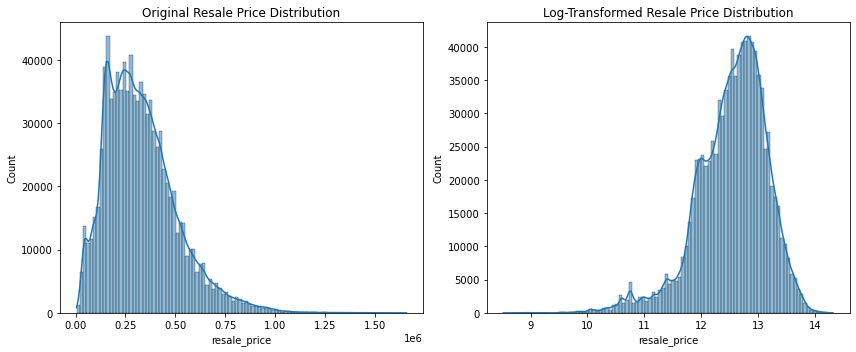

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_combined['resale_price'], bins=100, kde=True)
plt.title('Original Resale Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(np.log(df_combined['resale_price']), bins=100, kde=True)
plt.title('Log-Transformed Resale Price Distribution')

plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Regressors
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor

# --- Step 1: Feature set and log-transformed target ---
X = df_combined[['town', 'floor_area_sqm', 'flat_type', 'storey_range', 'flat_model', 'remaining_lease']]
y = np.log(df_combined['resale_price'])  # Apply log-transform

# --- Step 2: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# --- Step 3: Preprocessing transformers ---
numeric_features = ['floor_area_sqm', 'remaining_lease']
categorical_features = ['town', 'flat_type', 'storey_range', 'flat_model']

numeric_transformer = StandardScaler()

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=True, handle_unknown='ignore')),
    ('svd', TruncatedSVD(n_components=50, random_state=42))  # Dimensionality reduction
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# --- Step 4: Define models ---
clfs = [
    ('Linear Regression', LinearRegression()),
    ('Bayesian Ridge', BayesianRidge()),
    ('Lasso', Lasso(alpha=0.1)),
    ('Ridge', Ridge(alpha=0.5)),
    ('Decision Tree', DecisionTreeRegressor(max_depth=10))
]

# --- Step 5: Score storage ---
scores_df_a = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2'])

# --- Step 6: Train models, predict, evaluate ---
for name, model in clfs:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Predict in log scale
    y_pred_log = pipeline.predict(X_test)
    y_pred_train_log = pipeline.predict(X_train)
    
    # Convert back to actual prices
    y_pred = np.exp(y_pred_log)
    y_pred_train = np.exp(y_pred_train_log)
    y_test_actual = np.exp(y_test)
    y_train_actual = np.exp(y_train)

    # Evaluation on actual resale price
    scores_df_a = pd.concat([scores_df_a, pd.DataFrame([{
        'Model': name,
        'Train R2': r2_score(y_train_actual, y_pred_train),
        'MSE': mean_squared_error(y_test_actual, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_actual, y_pred)),
        'MAE': mean_absolute_error(y_test_actual, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test_actual, y_pred),
        'R2': r2_score(y_test_actual, y_pred)
    }])], ignore_index=True)

# --- Step 7: Show results ---
scores_df_a


,Model,MSE,RMSE,MAE,MAPE,R2,Train R2
0,Linear Regression,16692494629.028351,129199.437418,84759.950607,0.309126,0.483347,0.486896
1,Bayesian Ridge,16688794830.372622,129185.118456,84757.077832,0.309133,0.483461,0.486995
2,Lasso,24686211244.917747,157118.462457,111937.278748,0.463574,0.235931,0.234208
3,Ridge,16691164352.39447,129194.289163,84758.918305,0.309128,0.483388,0.486932
4,Decision Tree,6523927164.532437,80770.831149,54918.628299,0.197678,0.798076,0.799778


# Conclusion 
1. Model Performance based on all tests 
- While the Decision Tree model with log-transformation slightly outperformed XGBoost in terms of MAPE, this came at the cost of higher absolute errors (MAE) and lower variance explanation (R²). Since resale prices involve a wide range of values and stakeholders are typically more concerned with dollar-level prediction accuracy rather than percentage error, XGBoost is the better model overall. It achieves a higher R² (0.853) and significantly lower RMSE and MAE — meaning it generalizes better and performs more reliably across all price segments.

2. Purpose of the Analysis
- This project aimed to predict HDB resale prices based on property attributes such as location, floor_are, remaining lease etc. Accurate pricing predictions benefit potential home buyers, sellers, and property analysts, enabling more informed decision-making in Singapore’s real estate market.

3. Limitations
- While the model performs well overall, it does not currently account for temporal effects such as market cycles or policy changes (e.g., cooling measures) 
